In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
%pylab inline


import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [7]:
df1 = pd.read_csv('olist_orders_dataset.csv')

df2 = pd.read_csv('olist_order_payments_dataset.csv')
df3 = pd.read_csv('olist_order_items_dataset.csv')

df4 = pd.read_csv('olist_order_reviews_dataset.csv')

df5 = pd.read_csv('olist_customers_dataset.csv')

df6 = pd.read_csv('olist_products_dataset.csv')

df7 = pd.read_csv('olist_sellers_dataset.csv')

df8 = pd.read_csv('olist_geolocation_dataset.csv')

In [49]:
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
df1.isnull().sum().sum()

4908

In [16]:
df1 = df1.dropna()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         96461 non-null object
customer_id                      96461 non-null object
order_status                     96461 non-null object
order_purchase_timestamp         96461 non-null object
order_approved_at                96461 non-null object
order_delivered_carrier_date     96461 non-null object
order_delivered_customer_date    96461 non-null object
order_estimated_delivery_date    96461 non-null object
dtypes: object(8)
memory usage: 6.6+ MB


In [13]:
df1.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [19]:
df2.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [18]:
df2.isnull().sum().sum()

0

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
df3.isnull().sum().sum()

0

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
df6.isnull().sum().sum()

2448

In [23]:
df6 = df6.dropna()

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32340 non-null object
product_category_name         32340 non-null object
product_name_lenght           32340 non-null float64
product_description_lenght    32340 non-null float64
product_photos_qty            32340 non-null float64
product_weight_g              32340 non-null float64
product_length_cm             32340 non-null float64
product_height_cm             32340 non-null float64
product_width_cm              32340 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [50]:
df5.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
#first merge

inner_merge = pd.merge(df1, df2, on = 'order_id', how = 'inner')

In [6]:
inner_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [9]:
#second merge

inner_merge2 = pd.merge(inner_merge, df3, on = 'order_id', how = 'inner')




In [8]:
inner_merge2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [5]:
#third merge

inner_merge3 = pd.merge(inner_merge2, df4, on = 'order_id', how = 'inner')

In [ ]:
------------------------------------------working on 

In [10]:
##### #working on for capostone 3, merged orders, order_payments, order_items, products tables 

order_payments_products_merge = pd.merge(inner_merge2, df6, on = 'product_id', how = 'inner')

In [34]:
order_payments_products_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [11]:
order_payments_products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 26 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
payment_sequential               117601 non-null int64
payment_type                     117601 non-null object
payment_installments             117601 non-null int64
payment_value                    117601 non-null float64
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null ob

In [12]:
order_payments_products_merge.isnull().sum().sum()

10699

In [13]:
order_payments_products_merge = order_payments_products_merge.dropna()

In [14]:
#dropped nulls all together with merged tables instead of 1 by 1

order_payments_products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 117600
Data columns (total 26 columns):
order_id                         113390 non-null object
customer_id                      113390 non-null object
order_status                     113390 non-null object
order_purchase_timestamp         113390 non-null object
order_approved_at                113390 non-null object
order_delivered_carrier_date     113390 non-null object
order_delivered_customer_date    113390 non-null object
order_estimated_delivery_date    113390 non-null object
payment_sequential               113390 non-null int64
payment_type                     113390 non-null object
payment_installments             113390 non-null int64
payment_value                    113390 non-null float64
order_item_id                    113390 non-null int64
product_id                       113390 non-null object
seller_id                        113390 non-null object
shipping_limit_date              113390 non-null ob

In [16]:
formula = 'payment_value ~ price + C(payment_type) + payment_installments'

fitted_model = smf.ols(formula=formula, data=order_payments_products_merge).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          payment_value   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                 2.835e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:08:22   Log-Likelihood:            -7.4828e+05
No. Observations:              113390   AIC:                         1.497e+06
Df Residuals:                  113384   BIC:                         1.497e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         59.5421      1.241     47.983      0.000      57.110      61.974
C(payment_type)[T.credit_card]   -41.5500      1.457    -28.525      0.000     -44.405     -38.695
C(payment_type)[T.debit_card]    -30.4727      4.568     -6.670      0.000     -39.427     -21.519
C(payment_type)[T.voucher]      -110.4701      2.586    -42.722      0.000    -115.538    -105.402
price                              1.0413      0.003    345.282      0.000       1.035       1.047
payment_installments               8.3338      0.218     38.240      0.000       7.907       8.761
==============================================================================
Omnibus:                   280779.911   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      10794954859.389
Skew:                          26.364   Prob(JB):                         0.00
Kurtosis:                    1513.651   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
merged_tables = pd.merge(inner_merge2, df6, on = 'product_id', how = 'inner')
cols = ['customer_id', 'order_id', 'order_purchase_timestamp', 'payment_value']
merged_tables = merged_tables[cols]

merged_tables['order_purchase_timestamp'] = pd.to_datetime(merged_tables['order_purchase_timestamp'])
merged_tables['order_purchase_timestamp'] = merged_tables.order_purchase_timestamp.dt.date
merged_tables['order_purchase_timestamp'] = pd.to_datetime(merged_tables['order_purchase_timestamp'])

merged_tables.columns = ['Customer ID', 'Order ID', 'Order_Date', 'Payment Value' ]

merged_tables.info
display(merged_tables.sample(5))

,Customer ID,Order ID,Order_Date,Payment Value
116767,75fd680d4beb83356a3f1d9d9f0bc633,53b686fac427f7a62d0f32047dacd2fc,2018-06-06,48.97
38390,5f8bdf6ba12ce75e7360ad82b17eaa03,2baa8f1505935ad18a9409ec365c1988,2017-10-23,268.99
44682,936142b381374fdae2041552d1743af7,e38f9946fb20db4a597eed7547c59afc,2017-01-22,64.42
34279,d9d0060f76a6e87bf45958860a1a4d4e,a5543e119a631f1be4191fbc2c5e1e07,2018-08-15,68.25
44111,db637c48d8ee971814cfd998ec482496,d93483d856574edc5b6fc108348cf870,2017-11-19,171.87


In [17]:
merged_tables = pd.merge(inner_merge2, df6, on = 'product_id', how = 'inner')
cols = ['customer_id', 'order_id', 'order_purchase_timestamp', 'payment_value * payment_installments']
merged_tables = merged_tables[cols]

merged_tables['order_purchase_timestamp'] = pd.to_datetime(merged_tables['order_purchase_timestamp'])
merged_tables['order_purchase_timestamp'] = merged_tables.order_purchase_timestamp.dt.date
merged_tables['order_purchase_timestamp'] = pd.to_datetime(merged_tables['order_purchase_timestamp'])

merged_tables.columns = ['Customer ID', 'Order ID', 'Order_Date', 'Payment Value' ]

merged_tables.info
display(merged_tables.sample(5))

KeyError: "['payment_value * payment_installments'] not in index"

In [27]:
#working on

t_3m = merged_tables[(merged_tables.Order_Date < date(2018,10,1)) & (merged_tables.Order_Date >= date(2018,7,1))].reset_index(drop=True)
t_6m = merged_tables[(merged_tables.Order_Date >= date(2018,10,1)) & (merged_tables.Order_Date < date(2019,4,1))].reset_index(drop=True)

NameError: name 'date' is not defined

In [21]:
#use

RFM = merged_tables.groupby('Customer ID').agg({'Order Date': lambda y: (merged_tables['Order Date'].max().date() - y.max().date()).days,
                                              'Order ID': lambda y: len(y.unique()),  
                                              'Payment Value': lambda y: round(y.sum(),2)})

RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM = RFM.sort_values('Monetary', ascending=True)
RFM.head() 

,Recency,Frequency,Monetary
Customer ID,,,
a790343ca6f3fee08112d678b43aa7c5,9,1,9.59
184e8e8e48937145eb96c721ef1f0747,355,1,10.07
8e4bd65db637116b6b68109e4df21b84,74,1,10.89
046f890135acc703faff4c1fc0c2d73c,73,1,11.56
d2c63ad286e3ca9dd69218008d61ff81,606,1,11.62


In [23]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98665 entries, 1617b1357756262bfa56ab541c47bc16 to a790343ca6f3fee08112d678b43aa7c5
Data columns (total 3 columns):
Recency      98665 non-null int64
Frequency    98665 non-null int64
Monetary     98665 non-null float64
dtypes: float64(1), int64(2)
memory usage: 3.0+ MB


In [22]:
RFM = merged_tables.groupby('Customer ID').agg({'Order Date': lambda y: (merged_tables['Order Date'].max().date() - y.max().date()).days,
                                              'Order ID': lambda y: len(y.unique()),  
                                              'Payment Value': lambda y: round(y.sum(),2)})

RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM = RFM.sort_values('Monetary', ascending=False)
RFM.head() 

,Recency,Frequency,Monetary
Customer ID,,,
1617b1357756262bfa56ab541c47bc16,339,1,109312.64
bd5d39761aa56689a265d95d8d32b8be,376,1,45256.00
be1b70680b9f9694d8c70f41fa3dc92b,193,1,44048.00
05455dfa7cd02f13d132aa7a6a9729c6,283,1,36489.24
1ff773612ab8934db89fd5afa8afe506,137,1,30186.00


In [27]:
order_payments_products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 115901
Data columns (total 26 columns):
order_id                         115902 non-null object
customer_id                      115902 non-null object
order_status                     115902 non-null object
order_purchase_timestamp         115902 non-null object
order_approved_at                115888 non-null object
order_delivered_carrier_date     114695 non-null object
order_delivered_customer_date    113405 non-null object
order_estimated_delivery_date    115902 non-null object
payment_sequential               115902 non-null int64
payment_type                     115902 non-null object
payment_installments             115902 non-null int64
payment_value                    115902 non-null float64
order_item_id                    115902 non-null int64
product_id                       115902 non-null object
seller_id                        115902 non-null object
shipping_limit_date              115902 non-null ob

In [38]:
order_payments_products_merge.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=1, inplace=True)

In [ ]:
#USE
###below is the merged tables and dropping of duplicates and deleting 3 columns
###work on tomorrow to do rfm, and other models for cltv (look at rfm article that
##says you need the last purchase to do predictions etc )

In [39]:
order_payments_products_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 115901
Data columns (total 23 columns):
order_id                         115902 non-null object
customer_id                      115902 non-null object
order_status                     115902 non-null object
order_purchase_timestamp         115902 non-null object
order_estimated_delivery_date    115902 non-null object
payment_sequential               115902 non-null int64
payment_type                     115902 non-null object
payment_installments             115902 non-null int64
payment_value                    115902 non-null float64
order_item_id                    115902 non-null int64
product_id                       115902 non-null object
seller_id                        115902 non-null object
shipping_limit_date              115902 non-null object
price                            115902 non-null float64
freight_value                    115902 non-null float64
product_category_name            115902 non-null 

In [42]:
order_payments_products_merge.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000,115902.000000
mean,1.092820,2.945350,173.020069,1.196304,120.931690,20.075433,48.767493,786.950182,2.207874,2117.675459,30.310279,16.658211,23.110179
std,0.725244,2.779846,268.078052,0.699508,184.184747,15.870027,10.035000,653.039008,1.719536,3785.543670,16.224730,13.479965,11.757155
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,1.000000,61.010000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2.000000,108.200000,1.000000,74.900000,16.320000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,4.000000,189.720000,1.000000,134.900000,21.220000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [43]:
rfm_analysis=order_payments_products_merge[['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value', 'payment_installments', 'price']]

In [44]:
rfm_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 115901
Data columns (total 6 columns):
order_id                    115902 non-null object
customer_id                 115902 non-null object
order_purchase_timestamp    115902 non-null object
payment_value               115902 non-null float64
payment_installments        115902 non-null int64
price                       115902 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [40]:
df8.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


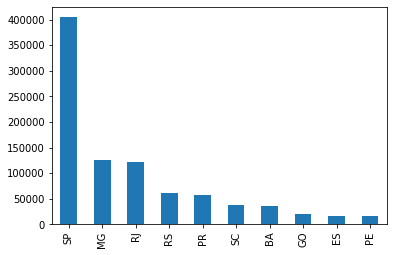

In [41]:
#USE
#distribution that relates to orders? need to check

df8.geolocation_state.value_counts()[:10].plot(kind='bar')

In [10]:
inner_merge3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [11]:
inner_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 24 columns):
order_id                         118315 non-null object
customer_id                      118315 non-null object
order_status                     118315 non-null object
order_purchase_timestamp         118315 non-null object
order_approved_at                118300 non-null object
order_delivered_carrier_date     117061 non-null object
order_delivered_customer_date    115727 non-null object
order_estimated_delivery_date    118315 non-null object
payment_sequential               118315 non-null int64
payment_type                     118315 non-null object
payment_installments             118315 non-null int64
payment_value                    118315 non-null float64
order_item_id                    118315 non-null int64
product_id                       118315 non-null object
seller_id                        118315 non-null object
shipping_limit_date              118315 non-null ob

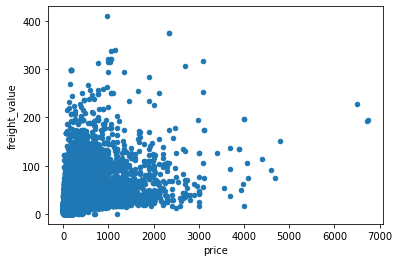

In [12]:
# Single variable regression
inner_merge3.plot('price','freight_value',kind='scatter')

In [6]:
#fourth merge

inner_merge4 = pd.merge(inner_merge3, df5, on = 'customer_id', how = 'inner')

In [14]:
inner_merge4.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [8]:
#fifth merge

inner_merge5 = pd.merge(inner_merge4, df6, on = 'product_id', how = 'inner')

In [16]:
inner_merge5.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [9]:
#sixth merge

inner_merge6 = pd.merge(inner_merge5, df7, on = 'seller_id', how = 'inner')

In [18]:
inner_merge6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


In [20]:
inner_merge6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 39 columns):
order_id                         118315 non-null object
customer_id                      118315 non-null object
order_status                     118315 non-null object
order_purchase_timestamp         118315 non-null object
order_approved_at                118300 non-null object
order_delivered_carrier_date     117061 non-null object
order_delivered_customer_date    115727 non-null object
order_estimated_delivery_date    118315 non-null object
payment_sequential               118315 non-null int64
payment_type                     118315 non-null object
payment_installments             118315 non-null int64
payment_value                    118315 non-null float64
order_item_id                    118315 non-null int64
product_id                       118315 non-null object
seller_id                        118315 non-null object
shipping_limit_date              118315 non-null ob

In [40]:
df7.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [39]:
df8.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [51]:
formula = 'price ~ payment_value + C(payment_type) + payment_installments + freight_value + product_weight_g'

fitted_model = smf.ols(formula=formula, data=inner_merge6).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                 2.315e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:24:48   Log-Likelihood:            -7.3375e+05
No. Observations:              118295   AIC:                         1.468e+06
Df Residuals:                  118287   BIC:                         1.468e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -14.5971      0.910    -16.040      0.000     -16.381     -12.813
C(payment_type)[T.credit_card]     7.9750      0.964      8.277      0.000       6.086       9.864
C(payment_type)[T.debit_card]     19.0735      3.006      6.345      0.000      13.182      24.965
C(payment_type)[T.voucher]        51.1368      1.705     29.984      0.000      47.794      54.479
payment_value                      0.4578      0.001    314.724      0.000       0.455       0.461
payment_installments               4.4642      0.145     30.867      0.000       4.181       4.748
freight_value                      1.4592      0.029     50.862      0.000       1.403       1.515
product_weight_g                   0.0024      0.000     20.112      0.000       0.002       0.003
==============================================================================
Omnibus:                    67835.552   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        235040331.490
Skew:                          -1.052   Prob(JB):                         0.00
Kurtosis:                     221.360   Cond. No.                     3.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""